# Which NBA Conference is Superior?

### Which NBA Conference is Superior?

##### A computational essay by Arman Ozsu and Luke Zahner




In [ ]:
print("this is code")

In [4]:
import matplotlib.pyplot as plt
from datetime import datetime
from nba_api.stats.endpoints import leaguestandings
import pandas as pd


def get_single_season_conference_win_loss_records(season):
    standings = leaguestandings.LeagueStandings(
        season=season, league_id="00", season_type="Regular Season"
    )
    standings_df = standings.get_data_frames()[0]

    records = {
        "Eastern Conference": {"Wins": 0, "Losses": 0},
        "Western Conference": {"Wins": 0, "Losses": 0},
    }

    for conference in ["East", "West"]:
        conf_teams = standings_df[standings_df["Conference"] == conference]
        total_wins = conf_teams["WINS"].sum()
        total_losses = conf_teams["LOSSES"].sum()

        conference_name = conference + "ern Conference"
        records[conference_name]["Wins"] = total_wins
        records[conference_name]["Losses"] = total_losses
        
    return records

In [5]:
def aggregate_conference_win_loss_records(seasons_back, save_to_csv=False):
    current_year = datetime.now().year
    current_month = datetime.now().month
    start_year = current_year - 1 if current_month < 10 else current_year

    aggregated_records = {
        "Eastern Conference": {"Wins": 0, "Losses": 0},
        "Western Conference": {"Wins": 0, "Losses": 0},
    }

    for year in range(start_year - seasons_back, start_year):
        season = f"{year}-{str(year + 1)[-2:]}"
        single_season_records = get_single_season_conference_win_loss_records(
            season
        )

        for conference in ["Eastern Conference", "Western Conference"]:
            aggregated_records[conference]["Wins"] += single_season_records[
                conference
            ]["Wins"]
            aggregated_records[conference]["Losses"] += single_season_records[
                conference
            ]["Losses"]

    if save_to_csv:
        # Convert the aggregated records into a DataFrame for saving to CSV
        records_df = pd.DataFrame.from_dict(aggregated_records, orient="index")
        csv_filename = (
            f"conference_win_loss_records_last_{seasons_back}_seasons.csv"
        )
        records_df.to_csv(csv_filename)
        print(f"Aggregated win-loss records saved to {csv_filename}")

    return aggregated_records

In [6]:
def plot_conference_win_loss_records(seasons_back):
    records = aggregate_conference_win_loss_records(seasons_back)

    # Prepare data for plotting
    east_wins = records["Eastern Conference"]["Wins"]
    west_wins = records["Western Conference"]["Wins"]

    # Set up the bar chart
    fig, ax = plt.subplots()
    ax.bar("Eastern Conference", east_wins, label="Eastern Conference")
    ax.bar("Western Conference", west_wins, label="Western Conference")

    # Add some text for labels and title
    ax.set_ylabel("Wins")
    ax.set_title(
        f"NBA Win-Loss Records by Conference Over the Past {seasons_back} Seasons"
    )
    ax.legend()

    plt.show()

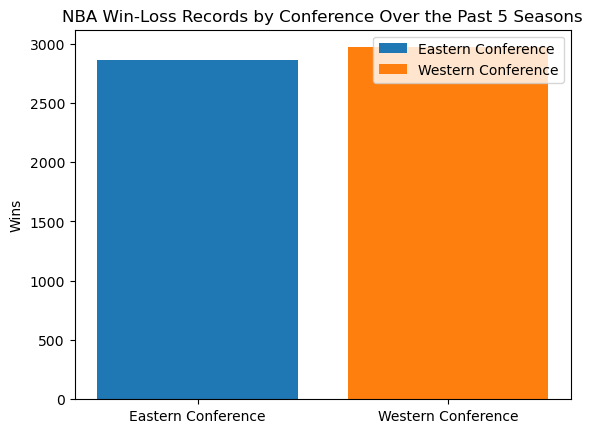

Aggregated win-loss records saved to conference_win_loss_records_last_5_seasons.csv


{'Eastern Conference': {'Wins': 2860, 'Losses': 2957},
 'Western Conference': {'Wins': 2969, 'Losses': 2872}}

In [7]:
seasons_back = 5  # Change to desired number of seasons
plot_conference_win_loss_records(seasons_back)
aggregate_conference_win_loss_records(seasons_back, save_to_csv=True)

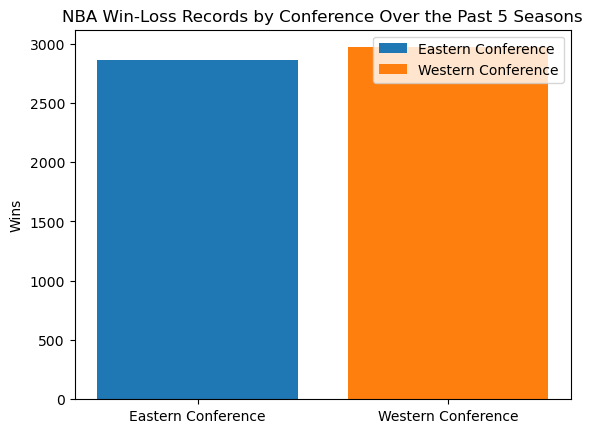

In [8]:
def plot_conference_win_loss_records_from_csv(seasons_back):
    # Construct the CSV file name based on the number of seasons
    csv_filename = f"conference_win_loss_records_last_{seasons_back}_seasons.csv"

    # Read the win-loss records from the CSV file
    records_df = pd.read_csv(csv_filename, index_col=0)  # Assuming the first column is the index

    # Extract wins for each conference
    east_wins = records_df.loc["Eastern Conference", "Wins"]
    west_wins = records_df.loc["Western Conference", "Wins"]

    # Set up the bar chart
    fig, ax = plt.subplots()
    ax.bar("Eastern Conference", east_wins, label="Eastern Conference")
    ax.bar("Western Conference", west_wins, label="Western Conference")

    # Add some text for labels and title
    ax.set_ylabel("Wins")
    ax.set_title(f"Wins by NBA Conference Over the Past {seasons_back} Seasons")
    ax.legend()

    plt.show()

# Example usage
seasons_back = 5  # Specify the number of seasons
plot_conference_win_loss_records_from_csv(seasons_back)

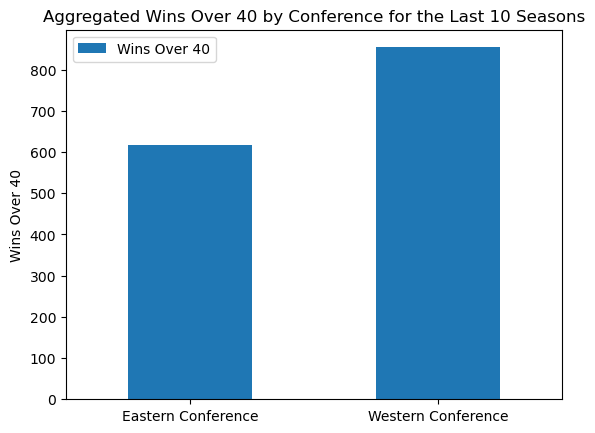

In [9]:
def plot_wins_over_40_from_csv(seasons_back):
    # Construct the CSV filename from the number of seasons back
    csv_filename = f"aggregated_wins_over_40_last_{seasons_back}_seasons.csv"

    # Read the aggregated data from the CSV file
    data = pd.read_csv(csv_filename, index_col=0)

    # Plot the data
    fig, ax = plt.subplots()
    data.plot(kind='bar', ax=ax, rot=0)

    # Customize the plot with labels and title
    ax.set_ylabel('Wins Over 40')
    ax.set_title(f'Aggregated Wins Over 40 by Conference for the Last {seasons_back} Seasons')
    ax.legend()

    # Show the plot
    plt.show()

# Example usage
seasons_back = 10  # Specify the number of seasons back
plot_wins_over_40_from_csv(seasons_back)